# Distance-based learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Dataset/online_retail_II.csv')

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df = df.dropna()

In [5]:
france_df = df[df['Country'] == 'France']
france_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.0,France
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.0,France
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55,12682.0,France
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
transactions = pd.get_dummies(france_df[['Invoice', 'StockCode']], columns=['StockCode']).groupby('Invoice').any()

In [7]:
transactions

,StockCode_10002,StockCode_10120,StockCode_10123C,StockCode_10123G,StockCode_10125,StockCode_10135,StockCode_11001,StockCode_15036,StockCode_15039,StockCode_15044C,...,StockCode_90208,StockCode_90209A,StockCode_90214C,StockCode_90214E,StockCode_90214L,StockCode_90214S,StockCode_ADJUST,StockCode_C2,StockCode_M,StockCode_POST
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
489557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
489883,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
490139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
490152,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
C579562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C580161,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [8]:
from sklearn.cluster import KMeans

- inertia is the sum of squared distances of samples to their closest cluster center.
    - the lower, the more compact cluster

In [9]:
MIN_K = 2
MAX_K = 20

In [10]:
results = {}

for k in range(MIN_K, MAX_K+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(transactions)
    results[k] = {
        'labels': kmeans.labels_,
        'centroids': kmeans.cluster_centers_,
        'inertia': kmeans.inertia_,
        'n_iter': kmeans.n_iter_
    }
    print('{}-means: with {} iterations , Inertia={}'.format(k, results[k]['n_iter'], results[k]['inertia']))

2-means: with 16 iterations , Inertia=12619.625707102468
3-means: with 14 iterations , Inertia=12454.92367947179
4-means: with 8 iterations , Inertia=12217.250768509499
5-means: with 27 iterations , Inertia=12279.625206255148
6-means: with 19 iterations , Inertia=12075.039854954357
7-means: with 14 iterations , Inertia=12066.642518274832
8-means: with 24 iterations , Inertia=12014.767896709038
9-means: with 17 iterations , Inertia=11835.328070967553
10-means: with 15 iterations , Inertia=11655.93104980024
11-means: with 22 iterations , Inertia=11533.65506071825
12-means: with 13 iterations , Inertia=11526.792658375998
13-means: with 22 iterations , Inertia=11572.86172912726
14-means: with 17 iterations , Inertia=11386.313846317464
15-means: with 18 iterations , Inertia=11425.34727635084
16-means: with 17 iterations , Inertia=11329.021286253761
17-means: with 15 iterations , Inertia=11175.031372413658
18-means: with 14 iterations , Inertia=11104.115826163636
19-means: with 12 iterations

In [11]:
inertia = np.array([(k, results[k]['inertia']) for k in range(MIN_K,MAX_K+1)])

inertia

array([[2.00000000e+00, 1.26196257e+04],
       [3.00000000e+00, 1.24549237e+04],
       [4.00000000e+00, 1.22172508e+04],
       [5.00000000e+00, 1.22796252e+04],
       [6.00000000e+00, 1.20750399e+04],
       [7.00000000e+00, 1.20666425e+04],
       [8.00000000e+00, 1.20147679e+04],
       [9.00000000e+00, 1.18353281e+04],
       [1.00000000e+01, 1.16559310e+04],
       [1.10000000e+01, 1.15336551e+04],
       [1.20000000e+01, 1.15267927e+04],
       [1.30000000e+01, 1.15728617e+04],
       [1.40000000e+01, 1.13863138e+04],
       [1.50000000e+01, 1.14253473e+04],
       [1.60000000e+01, 1.13290213e+04],
       [1.70000000e+01, 1.11750314e+04],
       [1.80000000e+01, 1.11041158e+04],
       [1.90000000e+01, 1.10108298e+04],
       [2.00000000e+01, 1.11176959e+04]])

In [12]:
from matplotlib import pyplot as plt

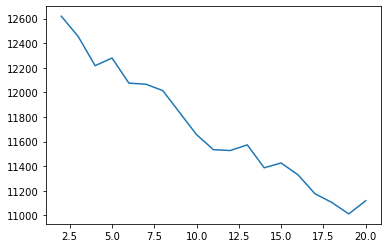

In [13]:
plt.plot(inertia[:,0], inertia[:,1])

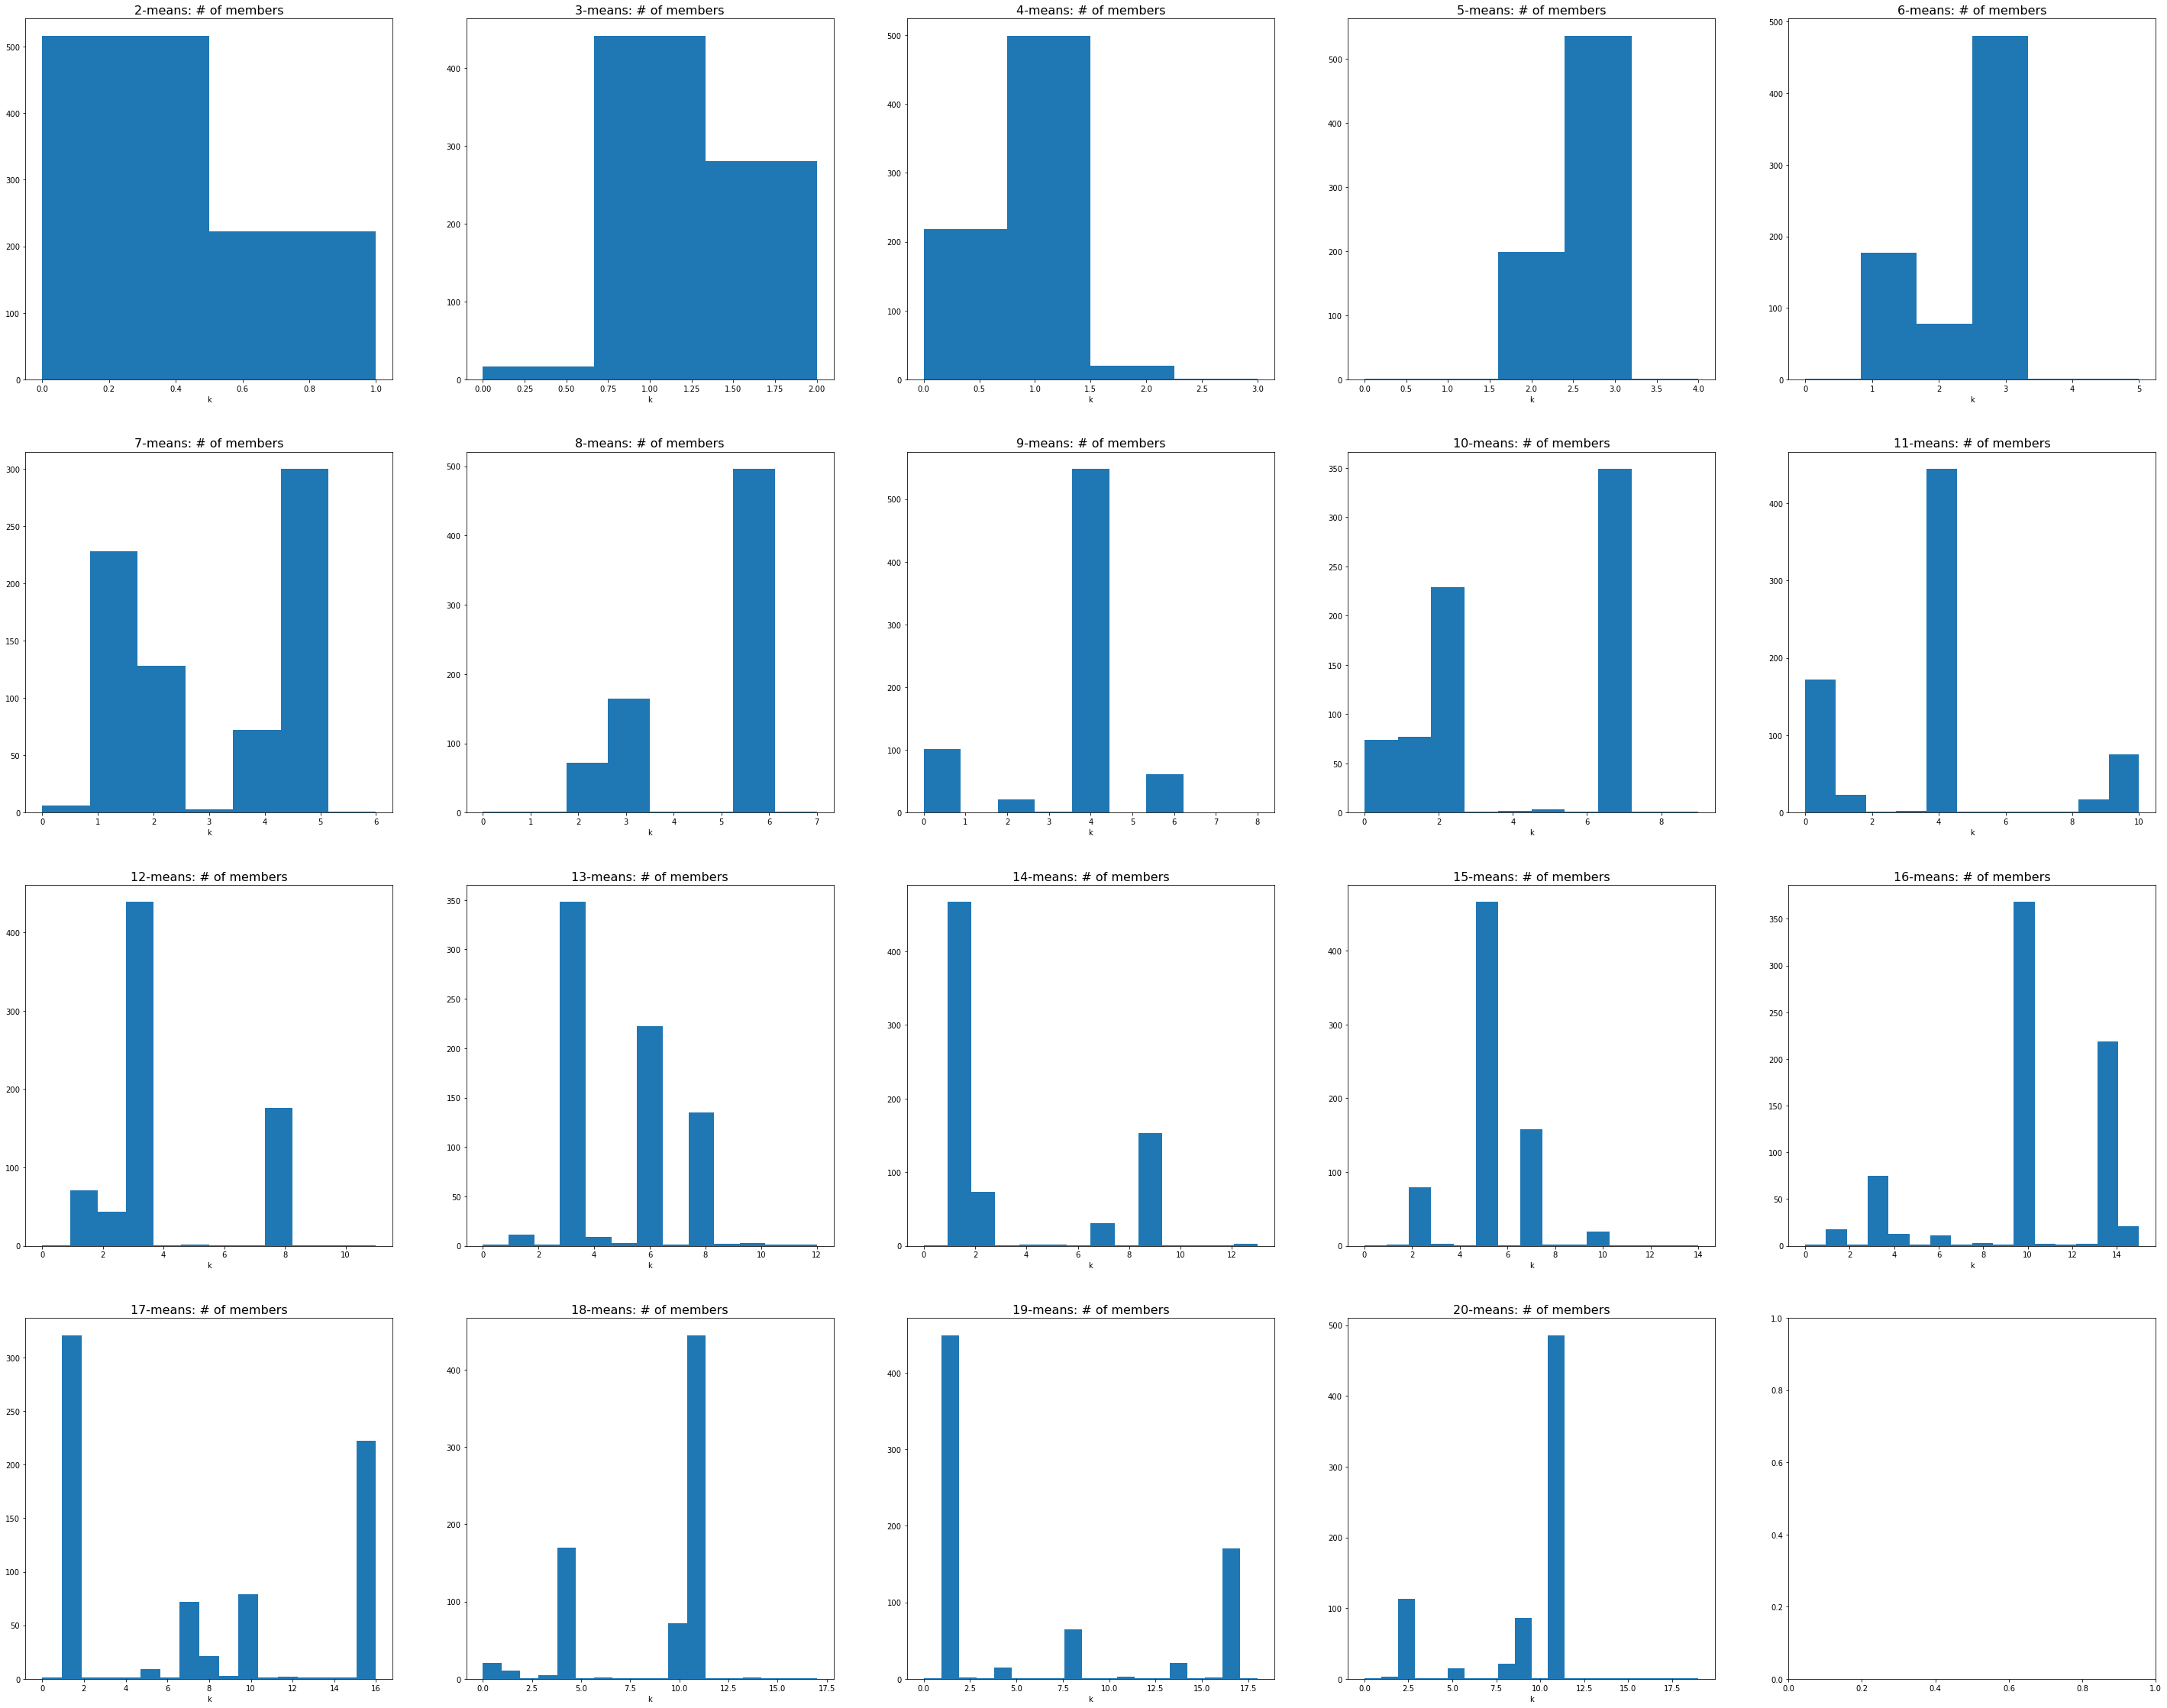

In [14]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results):
    row = i // 5
    col = i % 5
    
    ax[row,col].hist(results[k]['labels'], bins=k)
    ax[row,col].set_title('{}-means: # of members'.format(k), fontsize=16)
    ax[row,col].set_xlabel('k')
plt.show()

# Visualization

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)

In [17]:
transactions_2d = pca.fit_transform(transactions)

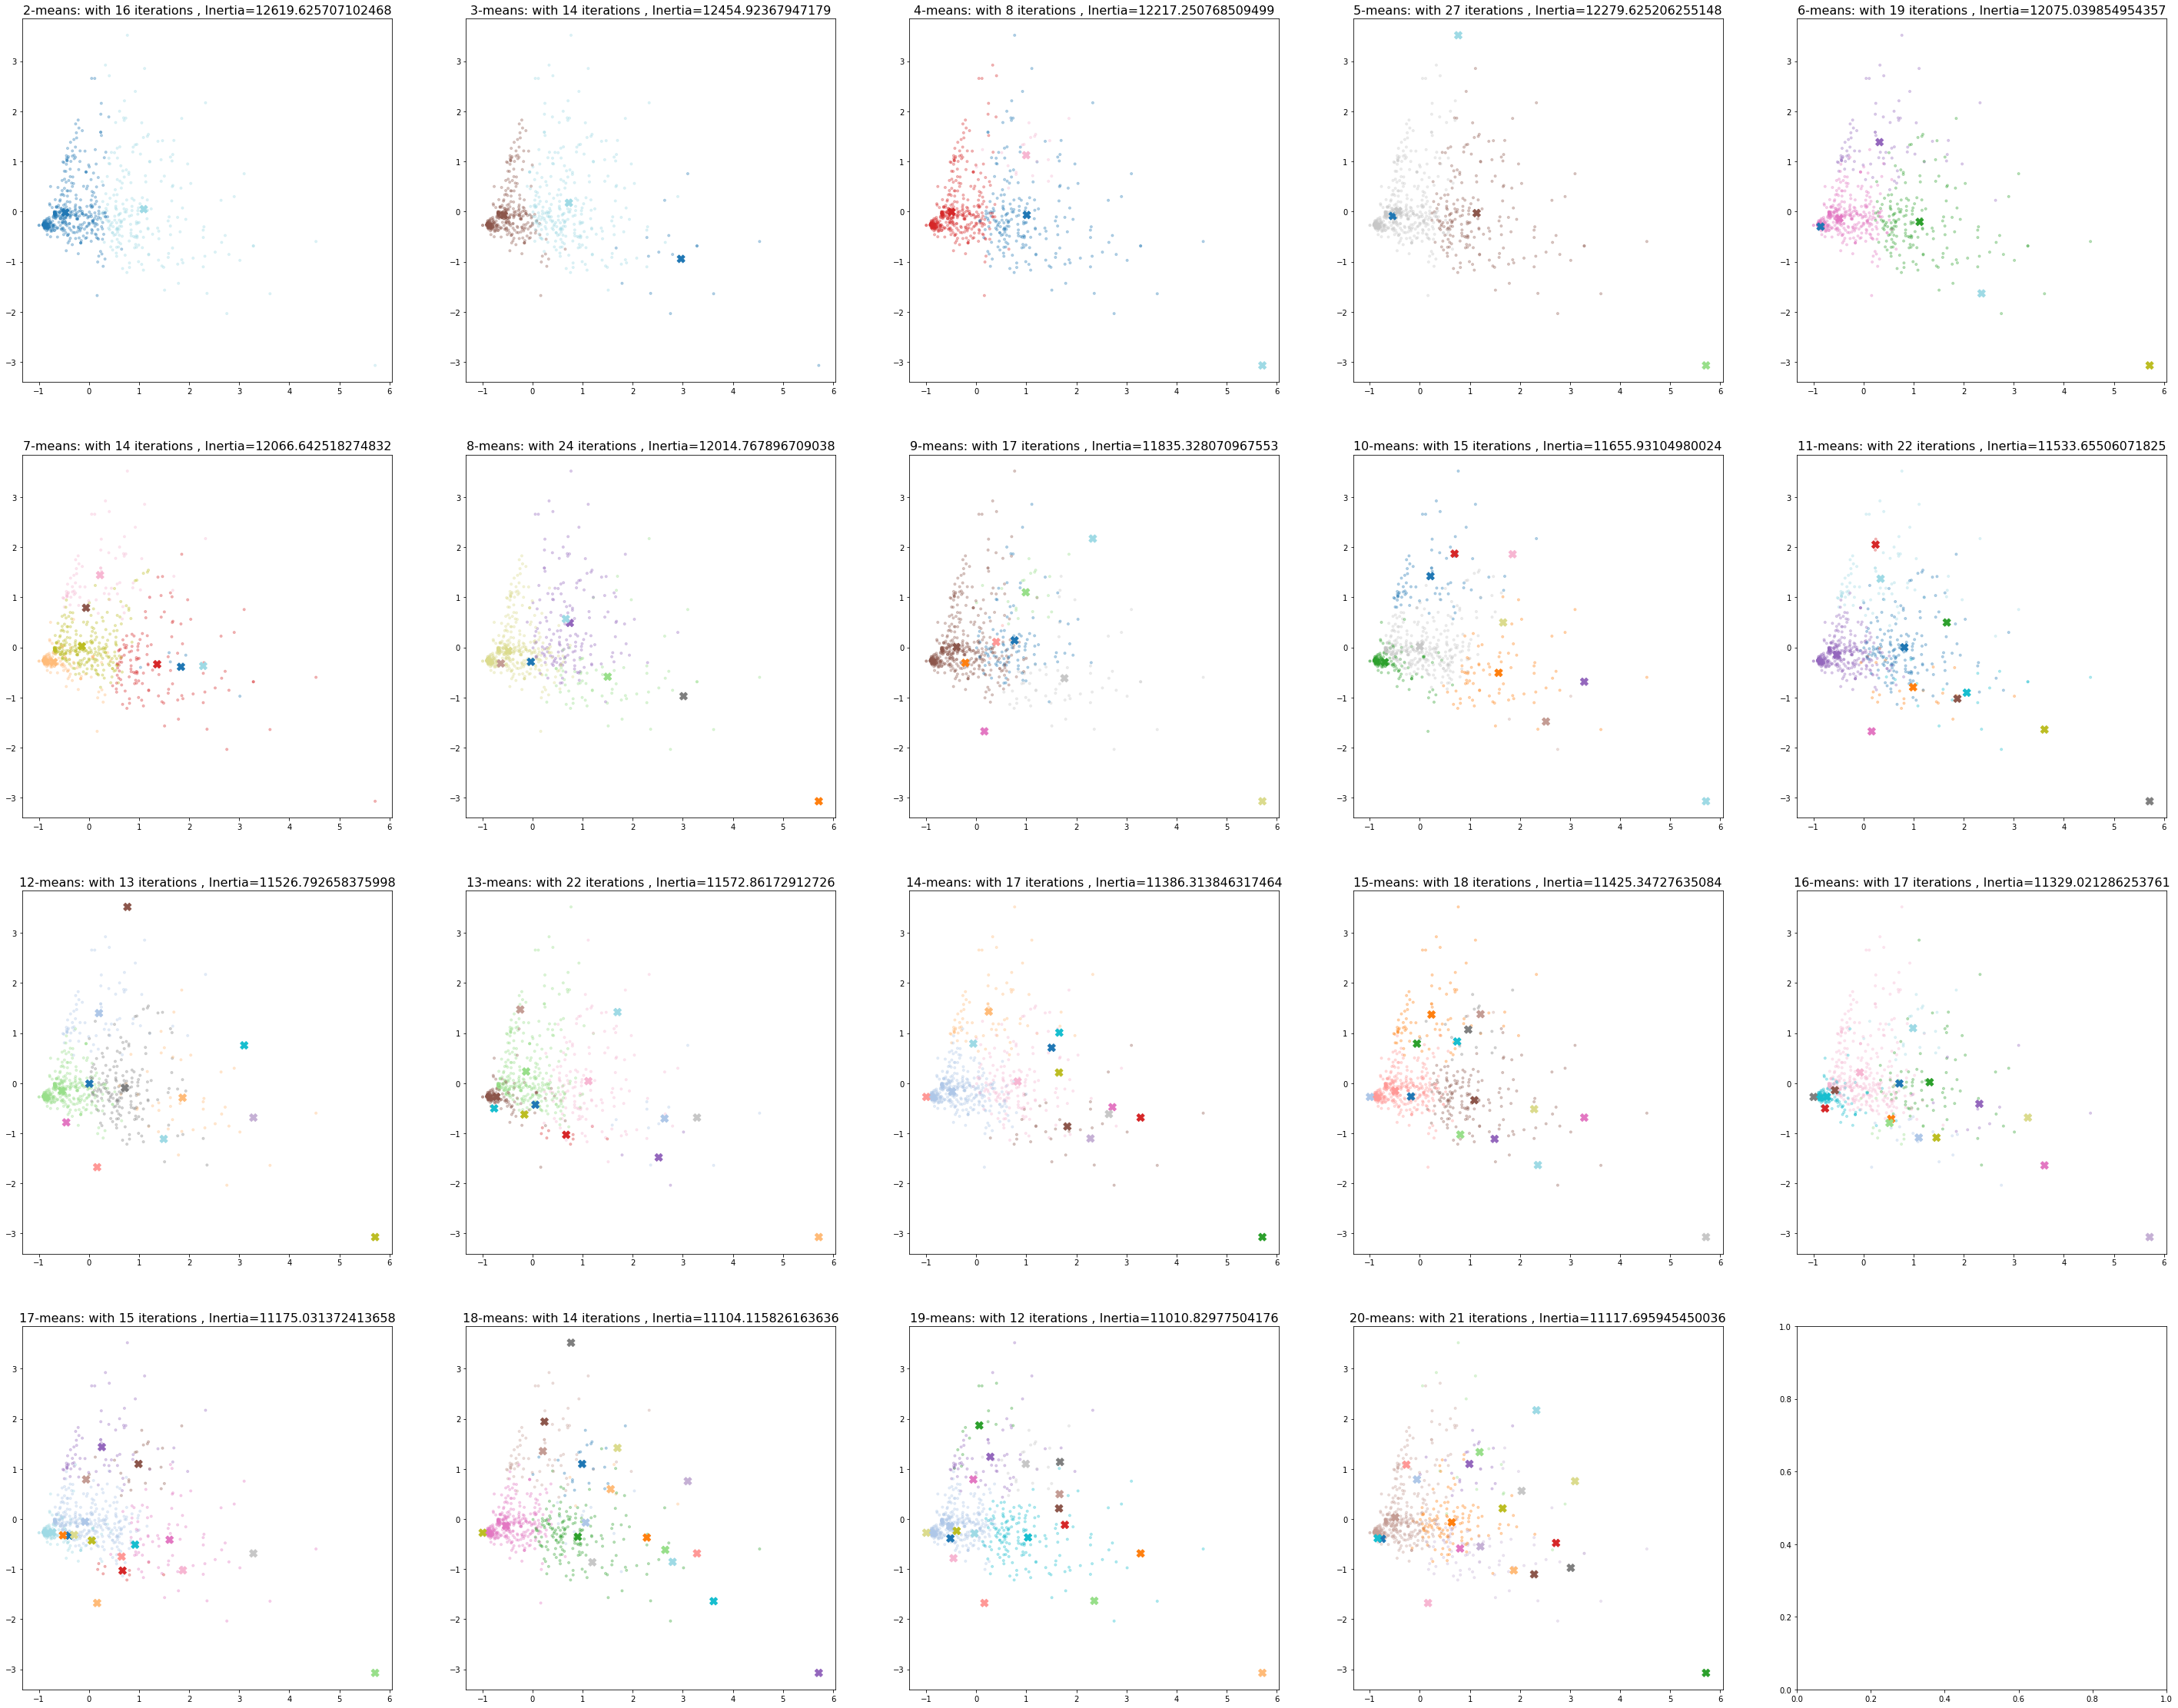

In [22]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results):
    row = i // 5
    col = i % 5
    
    centroids = pca.transform(results[k]['centroids'])

    ax[row,col].scatter(x=transactions_2d[:,0], y=transactions_2d[:,1], marker='.', c=results[k]['labels'], alpha=.3, cmap='tab20')
    ax[row,col].scatter(x=centroids[:,0], y=centroids[:,1], c=range(k), marker='X', s=100, cmap='tab20')
    ax[row,col].set_title('{}-means: with {} iterations , Inertia={}'.format(k, results[k]['n_iter'], results[k]['inertia']), fontsize=16)
plt.show()

# Clustering evaluation

- Silhouette coefficient 
$$ s = \frac{b - a}{\max(a,b)} $$
    - $a$ is the mean distance between a sample and _all other points_ in the same class.
    - $b$ is the mean distance between a sample and _all other points_ in the next nearest cluster.

    - Calculate the average silhoutte coefficient of all samples
    - The higher, the better
    
- Davies-Bouldin index
    - Average similarity between each cluster
$$ R_i = \frac{s_i + s_j}{d_{ij}} $$
    - $s_i$ is the average distance between each point of cluster $i$ and the centroid of the cluster
    - $d_{ij}$ is the distance bweteen cluster centroids $i$ and $j$

$$ DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} R_{ij} $$

    - The lower, the better

Ref: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [67]:
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

In [74]:
scores = {'Silhouette':{}, 'DB-index':{}, 'SilhouetteSample':{}, 'Silhouette-cityblock':{}}
for i, k in enumerate(results):
    scores['Silhouette'][k] = silhouette_score(transactions, results[k]['labels'])
    scores['Silhouette-cityblock'][k] = silhouette_score(transactions, results[k]['labels'], metric='cityblock')
    scores['DB-index'][k] = davies_bouldin_score(transactions, results[k]['labels'])
    scores['SilhouetteSample'][k] = silhouette_samples(transactions, results[k]['labels'])
    print('{}-means: Silhouette Coefficient={} / DB-index={}'.format(k, scores['Silhouette'][k], scores['DB-index'][k]))

2-means: Silhouette Coefficient=0.1688648495842336 / DB-index=5.173984870525206
3-means: Silhouette Coefficient=0.17758563203193675 / DB-index=3.5383262772563193
4-means: Silhouette Coefficient=0.17747952474926731 / DB-index=3.0995648306827723
5-means: Silhouette Coefficient=-0.014220953385634368 / DB-index=3.4493800658221914
6-means: Silhouette Coefficient=0.11116145992038964 / DB-index=3.0426668026143537
7-means: Silhouette Coefficient=0.15113019228389407 / DB-index=2.6837711453774213
8-means: Silhouette Coefficient=0.11778644283924289 / DB-index=2.7162548656092933
9-means: Silhouette Coefficient=0.10479217236824738 / DB-index=2.2468476252401706
10-means: Silhouette Coefficient=0.15539228170527974 / DB-index=2.30195388141898
11-means: Silhouette Coefficient=-0.010338348016584372 / DB-index=2.0133473687217625
12-means: Silhouette Coefficient=0.11734254877424957 / DB-index=1.9129024006197752
13-means: Silhouette Coefficient=-0.11263898586889218 / DB-index=2.652457253805516
14-means: Si

Text(0.5, 1.0, 'Silhouette score')

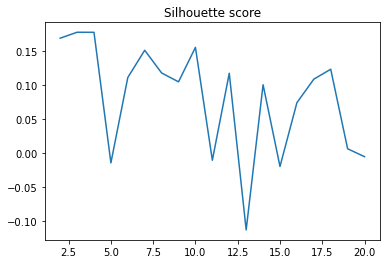

In [75]:
x,y = zip(*scores['Silhouette'].items())
plt.plot(x, y)
plt.title('Silhouette score')

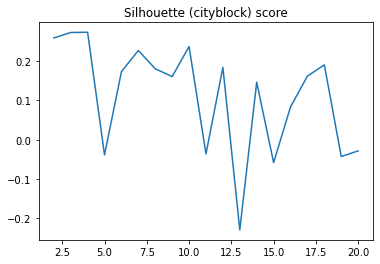

In [81]:
x,y = zip(*scores['Silhouette-cityblock'].items())
plt.plot(x, y)
plt.title('Silhouette (cityblock) score')
plt.show()

# Choosing $k$

## Elbow method

Choose $k$ based on the **elbow** in the evaluation plot

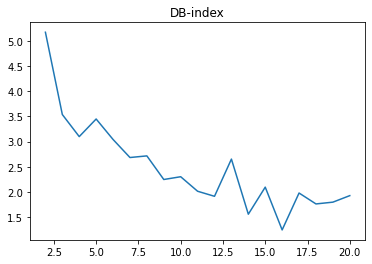

In [80]:
x,y = zip(*scores['DB-index'].items())
plt.plot(x, y)
plt.title('DB-index')
plt.show()

## Silhouette score
- Silhouette coefficient 
$$ s = \frac{b - a}{\max(a,b)} $$
    - $a$ is the mean distance between a sample and _all other points_ in the same class.
    - $b$ is the mean distance between a sample and _all other points_ in the next nearest cluster. 
    
- If the point far away from other clusters, the score will be positive
- If the point is close to other clusters, the score will be near zero
- If the point is overlap with other clusters, the score will be negative

Each class silhoutte score (distanceshould be similar to th

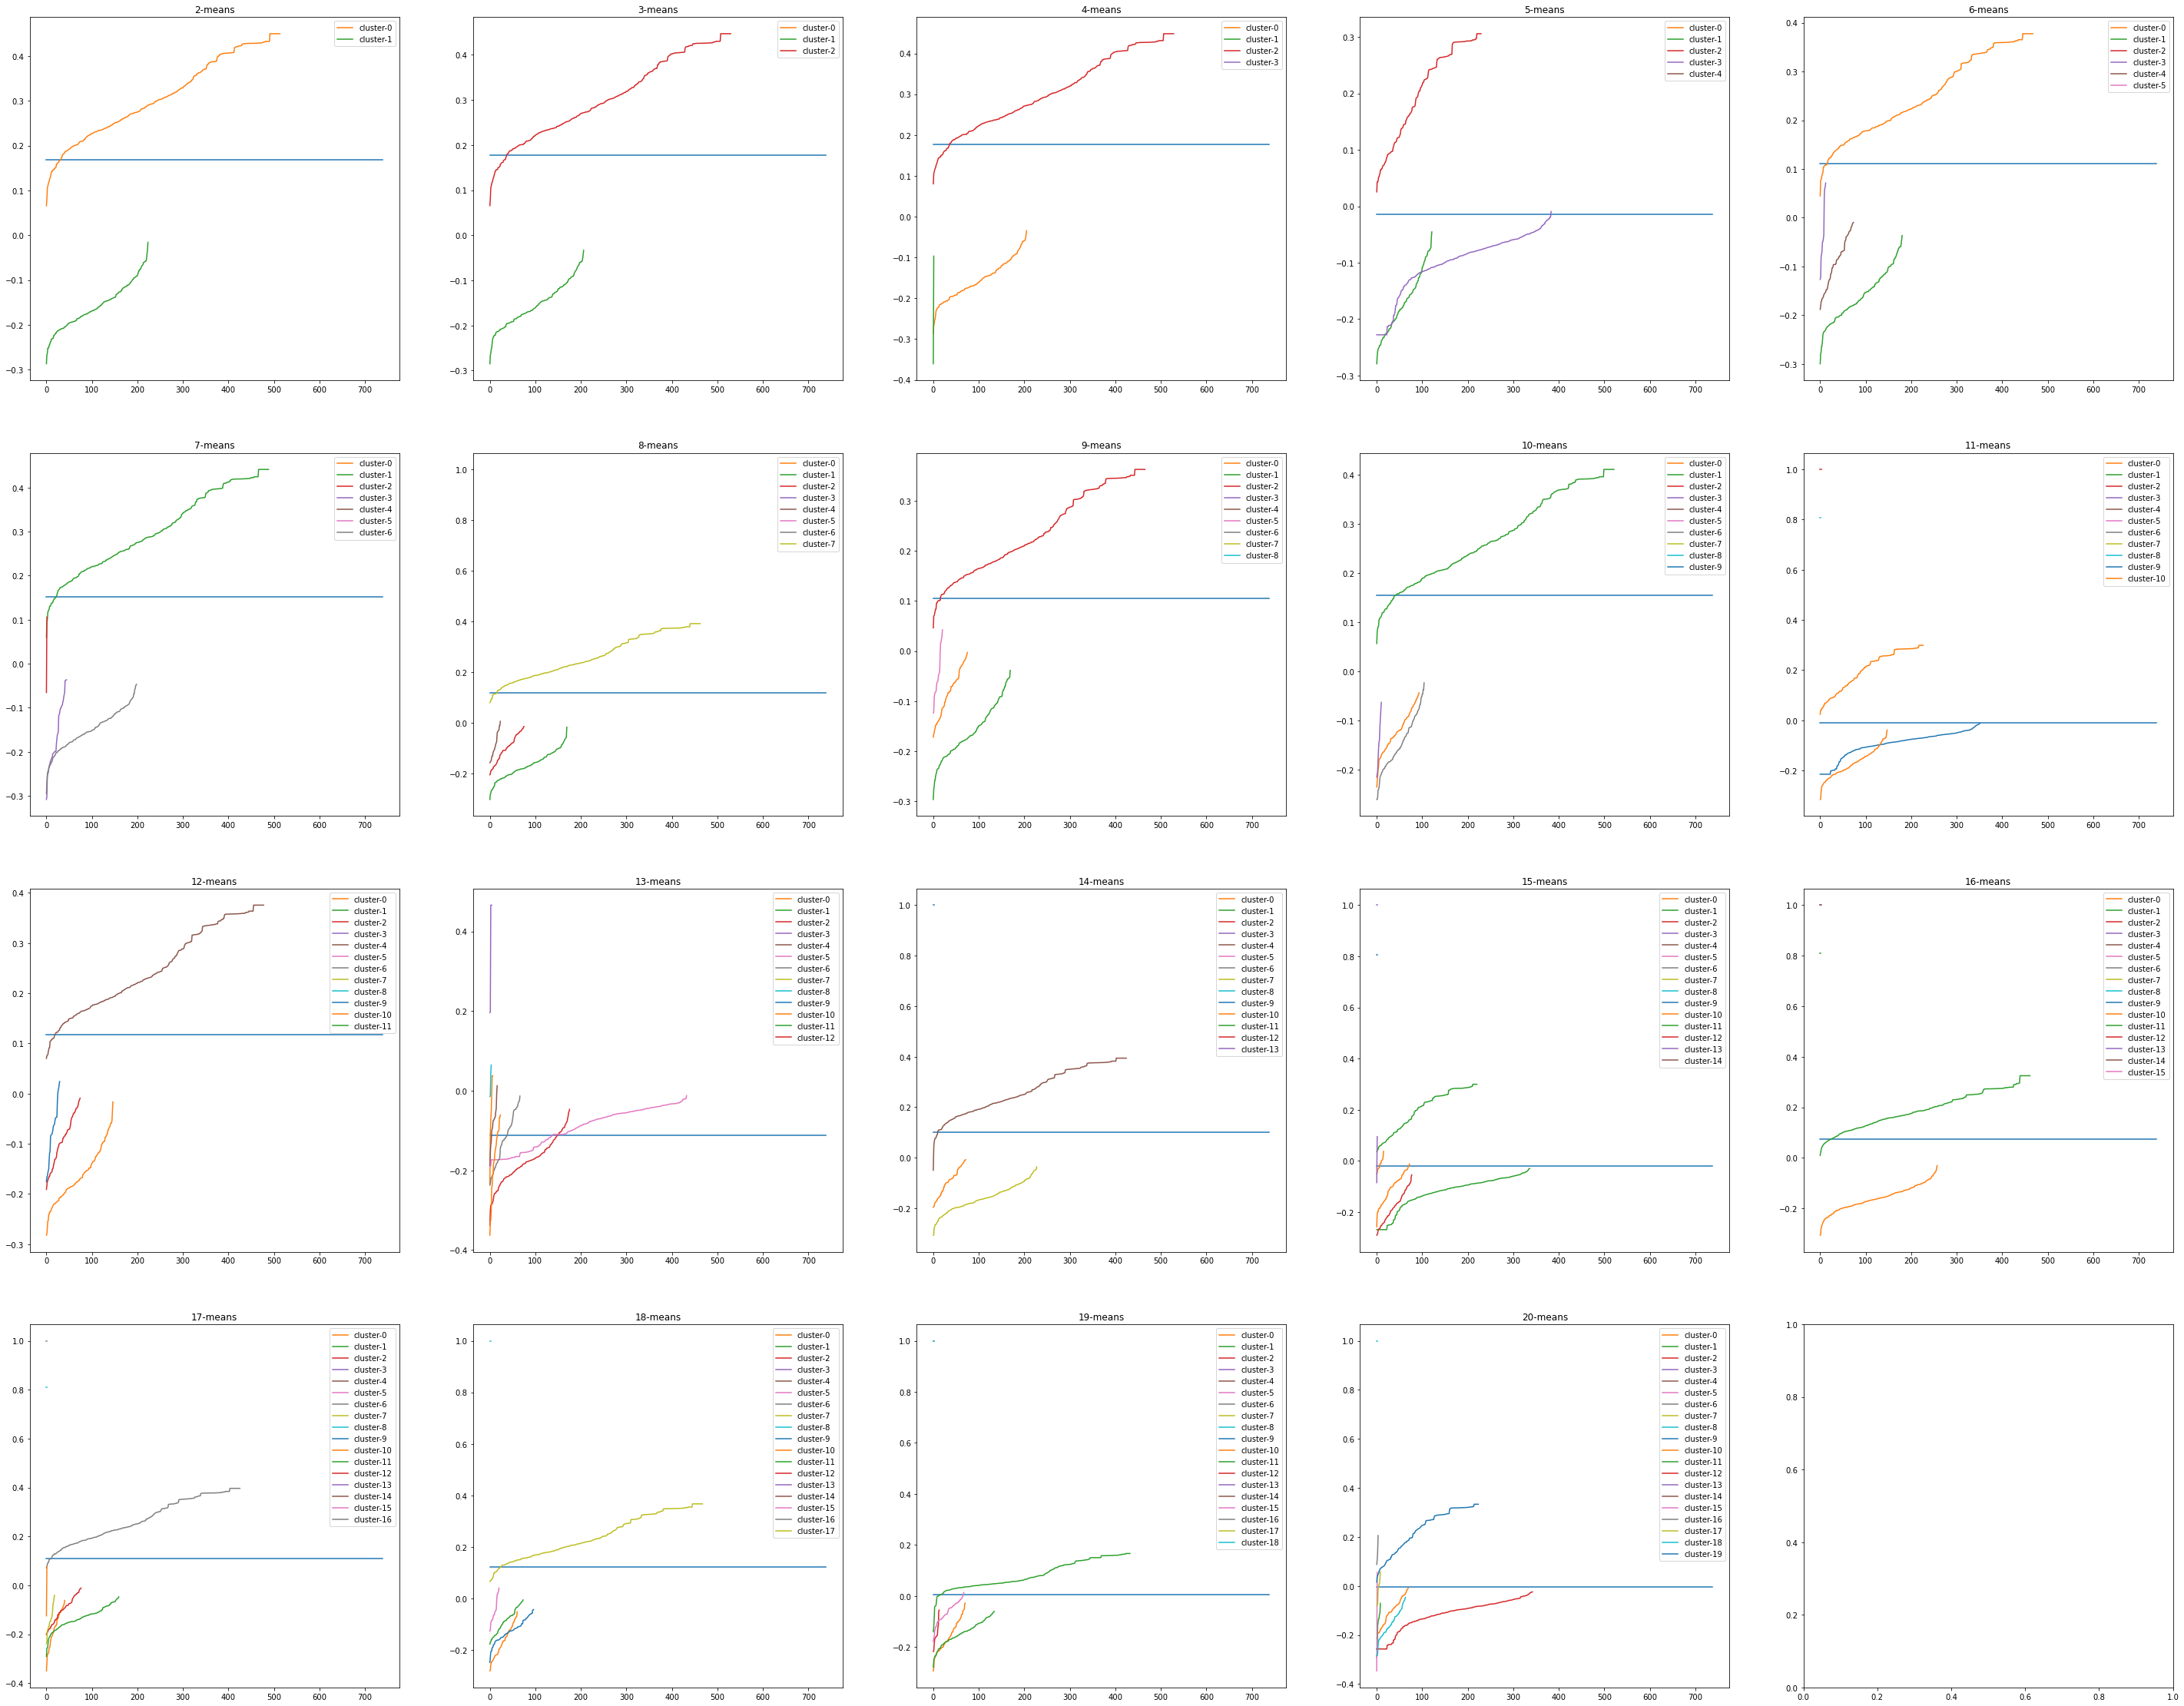

In [89]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results):
    row = i // 5
    col = i % 5

    
    ax[row,col].plot([0,len(scores['SilhouetteSample'][k])], [scores['Silhouette'][k]]*2)
    for i in range(k):
        ax[row,col].plot(sorted(scores['SilhouetteSample'][k][results[k]['labels'] == i]), label='cluster-{}'.format(i))
    ax[row,col].set_title('{}-means'.format(k))
    ax[row,col].legend()

plt.show()

# K-Modes

Ref: https://github.com/nicodv/kmodes

In [91]:
!pip install kmodes

In [92]:
from kmodes.kmodes import KModes

In [100]:
results = {}

for k in range(MIN_K, MAX_K+1):
    kmodes = KModes(n_clusters=k)
    kmodes.fit(transactions)
    results[k] = {
        'labels': kmodes.labels_,
        'centroids': kmodes.cluster_centroids_,
        'inertia': kmodes.cost_,
        'n_iter': kmodes.n_iter_
    }
    print('{}-modes: with {} iterations , Cost={}'.format(k, results[k]['n_iter'], results[k]['inertia']))

2-modes: with 1 iterations , Cost=13369.0
3-modes: with 1 iterations , Cost=13245.0
4-modes: with 1 iterations , Cost=13145.0
5-modes: with 1 iterations , Cost=13055.0
6-modes: with 1 iterations , Cost=12967.0
7-modes: with 1 iterations , Cost=12885.0
8-modes: with 1 iterations , Cost=12804.0
9-modes: with 1 iterations , Cost=12723.0
10-modes: with 1 iterations , Cost=12643.0
11-modes: with 1 iterations , Cost=12566.0
12-modes: with 1 iterations , Cost=12490.0
13-modes: with 1 iterations , Cost=12418.0
14-modes: with 1 iterations , Cost=12347.0
15-modes: with 1 iterations , Cost=12276.0
16-modes: with 1 iterations , Cost=12140.0
17-modes: with 1 iterations , Cost=12072.0
18-modes: with 1 iterations , Cost=12004.0
19-modes: with 1 iterations , Cost=11936.0
20-modes: with 1 iterations , Cost=11869.0


In [102]:
inertia = np.array([(k, results[k]['inertia']) for k in range(MIN_K,MAX_K+1)])

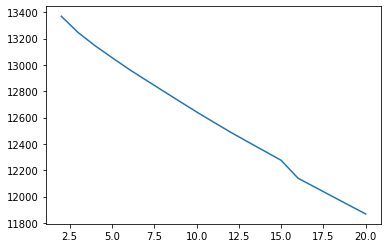

In [103]:
plt.plot(inertia[:,0], inertia[:,1])

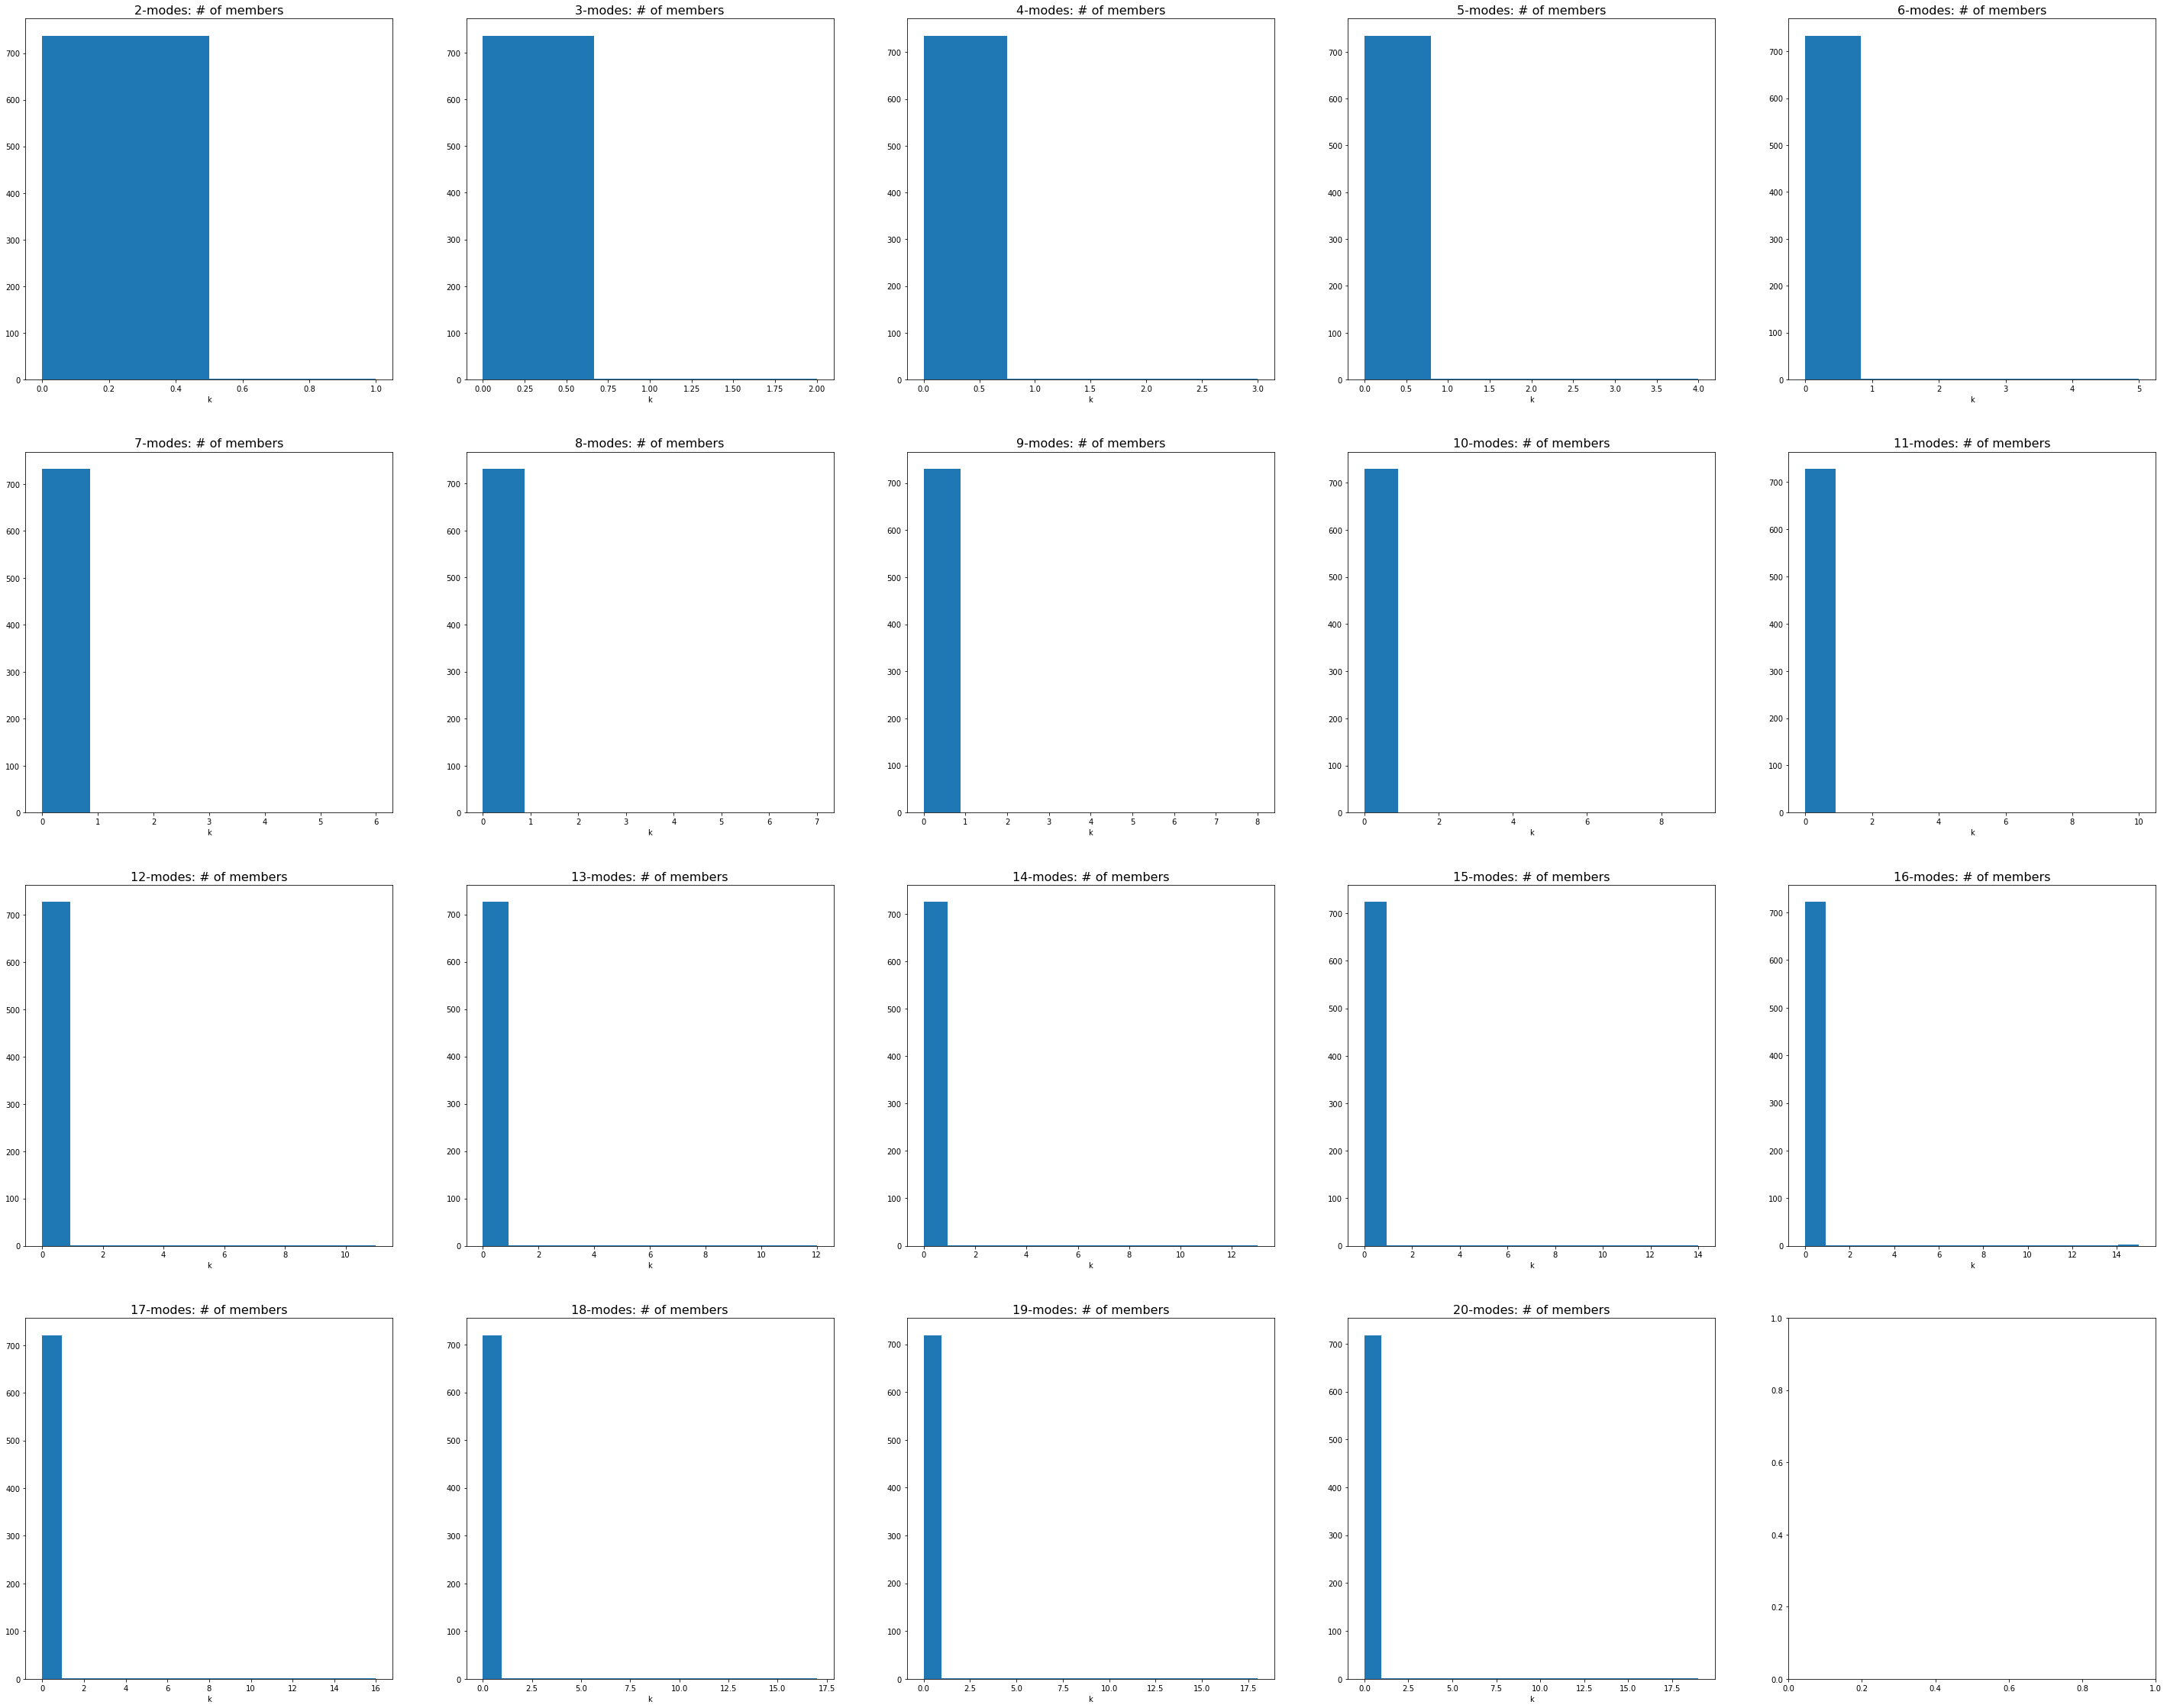

In [105]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results):
    row = i // 5
    col = i % 5
    
    ax[row,col].hist(results[k]['labels'], bins=k)
    ax[row,col].set_title('{}-modes: # of members'.format(k), fontsize=16)
    ax[row,col].set_xlabel('k')
plt.show()

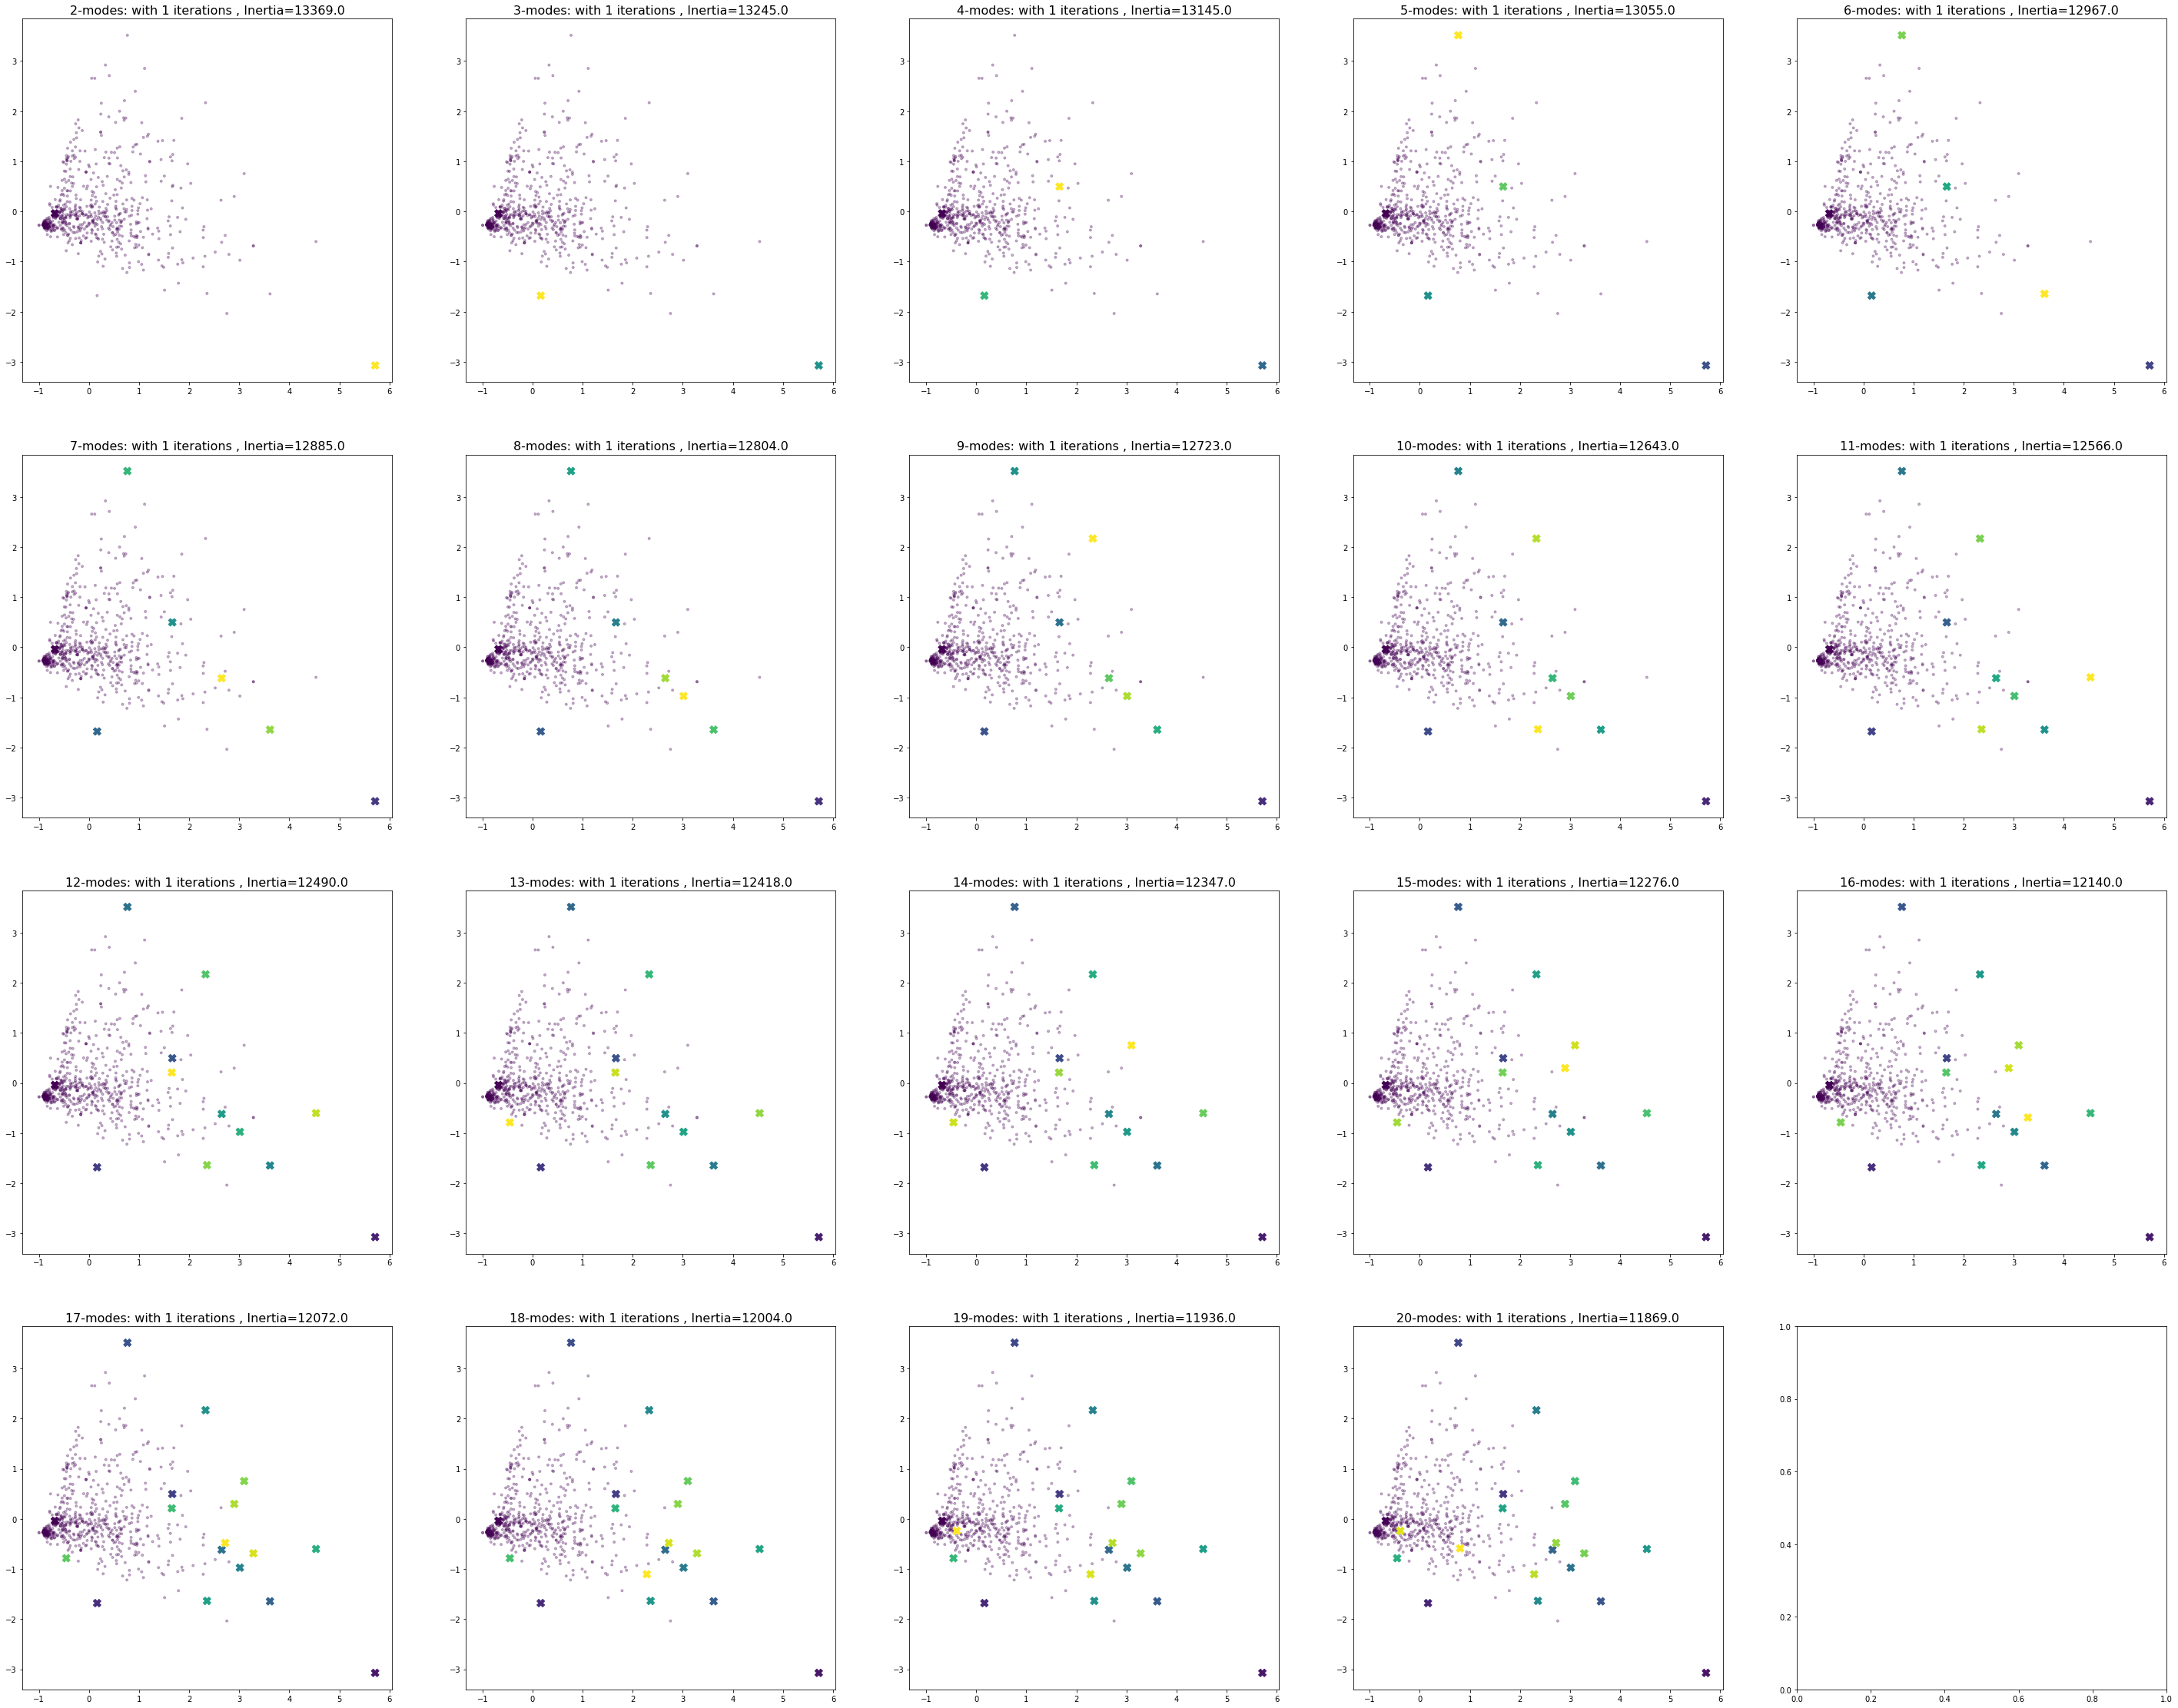

In [101]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results):
    row = i // 5
    col = i % 5
    
    centroids = pca.transform(results[k]['centroids'])

    ax[row,col].scatter(x=transactions_2d[:,0], y=transactions_2d[:,1], marker='.', c=results[k]['labels'], alpha=.3)
    ax[row,col].scatter(x=centroids[:,0], y=centroids[:,1], c=range(k), marker='X', s=100)
    ax[row,col].set_title('{}-modes: with {} iterations , Inertia={}'.format(k, results[k]['n_iter'], results[k]['inertia']), fontsize=16)
plt.show()

In [1]:
results[10]

NameError: name 'results' is not defined